# ASSIGNMENT 3

### Search Culture: Mental health symptom seeking online

This study aimed to examine the correlation between Google search trends for mental health-related terms and doctor visits in Denmark, with the goal of understanding whether online interest in mental health topics reflects actual visits at the doctor.

Research question:
How is the correlation between Googling mental health related search terms and doctor visits in Denmark?



### Downloading nessecary packages

In [1]:

install.packages("tidyr")
library(tidyr)

install.packages("ggplot2")
library(ggplot2)

install.packages("dplyr")
library(dplyr)

install.packages("reshape2")
library(reshape2)


Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




### Mental health related searches in Dennmark (Google Trends data)

In [53]:
# Reading the CSV file with Google Trends data and storing it in a dataframe
google_trends_df <- read.csv("mental_health.csv", header = TRUE, sep = ",", row.names = NULL, skip = 1)

# Changing coloumn names in dataframe so it matches the date and search term
colnames(google_trends_df) <- c("Year", "Angst", "Depression", "Frygt", "Ensomhed", "Selvmord")

# Convert date so it is in years (and not years + month)
google_trends_df$Year <- as.numeric(substr(google_trends_df$Year, 1, 4))

# Filtering the dataframe to the years 2006 - 2023
# (This is because we will correlate it to data with doctor visits, which only contains data in these years)
google_trends_df <- google_trends_df %>%
  filter(Year >= 2006 & Year <= 2023)

# Get a view of our dataframe now
head(google_trends_df)


,Year,Angst,Depression,Frygt,Ensomhed,Selvmord
,<dbl>,<int>,<int>,<int>,<int>,<int>
1,2006,29,58,0,0,30
2,2006,25,50,0,7,30
3,2006,25,45,0,6,31
4,2006,22,49,0,6,24
5,2006,24,41,7,0,20
6,2006,22,42,0,0,21


### Doctors visits in Denmark (Statistikbanken)

In [3]:
# Creating dataframe with numbers of doctor visits in the years 2006 to 2023 
doc_visit_df <- data.frame(
  Year = c(2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023),
  Doctor_visits = c(38245534, 38709910, 39950786, 40234920, 40078989, 40902732, 40112598, 39424911, 39309573, 39499855, 39936200, 40339451, 40379447, 40894522, 45070332, 42885382, 42314206, 43524696))

# Indexing doctor visits during the years (minus 100 in the end to see the development since 2006)
doc_visit_df$Doctor_visits <- (doc_visit_df$Doctor_visits/doc_visit_df$Doctor_visits[1]) * 100 - 100

# Get a view of the dataframe
head(doc_visit_df)


,Year,Doctor_visits
,<dbl>,<dbl>
1,2006,0.000000
2,2007,1.214197
3,2008,4.458696
4,2009,5.201616
5,2010,4.793906
6,2011,6.947734


### Plot of index for Google Searches and Doctor Visits

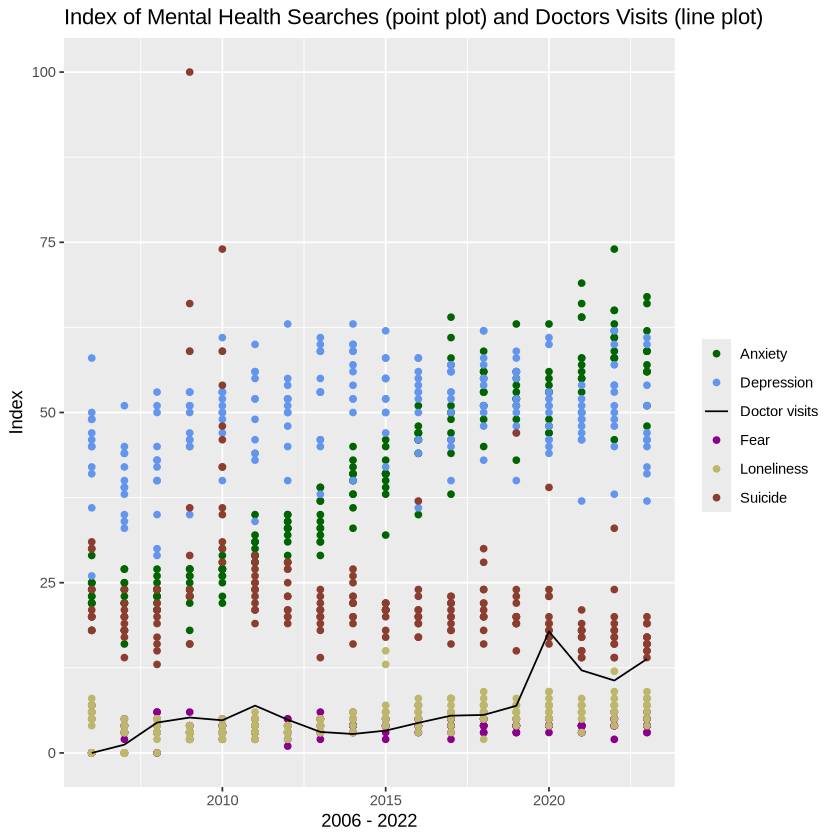

In [44]:
# Data visualization with ggplot - making point plots with Google Trends data, and a line with doctor visits
# Adding colours, labels, titles etc. 

index_plot <- ggplot() + 
    geom_point(data = google_trends_df, aes(x = Year, y = Angst, color = "Anxiety")) + 
    geom_point(data = google_trends_df, aes(x = Year, y = Depression, color = "Depression")) + 
    geom_point(data = google_trends_df, aes(x = Year, y = Selvmord, color = "Suicide")) + 
    geom_point(data = google_trends_df, aes(x = Year, y = Frygt, color = "Fear")) + 
    geom_point(data = google_trends_df, aes(x = Year, y = Ensomhed, color = "Loneliness")) +
    geom_line(data = doc_visit_df, aes(x = Year, y = Doctor_visits, color = "Doctor visits")) +  
    
    scale_color_manual(values = c(
      "Anxiety" = "darkgreen",
      "Depression" = "cornflowerblue",
      "Fear" = "darkmagenta",
      "Loneliness" = "darkkhaki",
      "Suicide" = "coral4",
      "Doctor visits" = "black")) +  
    
    labs(
      title = "Index of Mental Health Searches (point plot) and Doctors Visits (line plot)",
      x = "2006 - 2022",
      y = "Index",
      color = "") 

index_plot

### Combining 'Google Searches' and 'Doctor Visits' dataframes

In [5]:
# Creating a new dataframe to take the mean index of each search term grouped by year
mean_google_trends <- google_trends_df %>%
  group_by(Year) %>%
  summarise(
    Angst = mean(Angst, na.rm = TRUE),
    Depression = mean(Depression, na.rm = TRUE),
    Frygt = mean(Frygt, na.rm = TRUE),
    Ensomhed = mean(Ensomhed, na.rm = TRUE),
    Selvmord = mean(Selvmord, na.rm = TRUE))
head(mean_google_trends)

Year,Angst,Depression,Frygt,Ensomhed,Selvmord
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2006,23.33333,44.50000,1.500000,3.416667,23.00000
2007,22.91667,40.33333,2.833333,2.083333,19.25000
2008,23.33333,41.75000,3.250000,3.250000,19.91667
2009,24.33333,48.41667,3.333333,3.000000,36.50000
2010,26.41667,51.50000,3.416667,3.166667,43.75000
2011,29.75000,49.25000,3.500000,3.666667,24.16667


In [52]:
# Combining the dataframe of mean indexes of Google Searches and index of doctor visits
combined_df <- merge(mean_google_trends, doc_visit_df, by = "Year")

# Creating a coloumn to add the mean index for all search terms per year
combined_df$mean_google_trends <- rowMeans(combined_df[, c("Angst", "Depression", "Frygt", "Ensomhed", "Selvmord")], na.rm = TRUE)
head(combined_df)

,Year,Angst,Depression,Frygt,Ensomhed,Selvmord,Doctor_visits,mean_google_trends
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2006,23.33333,44.50000,1.500000,3.416667,23.00000,0.000000,19.15000
2,2007,22.91667,40.33333,2.833333,2.083333,19.25000,1.214197,17.48333
3,2008,23.33333,41.75000,3.250000,3.250000,19.91667,4.458696,18.30000
4,2009,24.33333,48.41667,3.333333,3.000000,36.50000,5.201616,23.11667
5,2010,26.41667,51.50000,3.416667,3.166667,43.75000,4.793906,25.65000
6,2011,29.75000,49.25000,3.500000,3.666667,24.16667,6.947734,22.06667


### Correlation with the mean of all search terms

In [32]:
# Making a correlation test to analyse the data
cor.test(combined_df$mean_google_trends, combined_df$Doctor_visits)


	Pearson's product-moment correlation

data:  combined_df$mean_google_trends and combined_df$Doctor_visits
t = 2.9642, df = 16, p-value = 0.009136
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1780001 0.8312097
sample estimates:
      cor 
0.5953914 


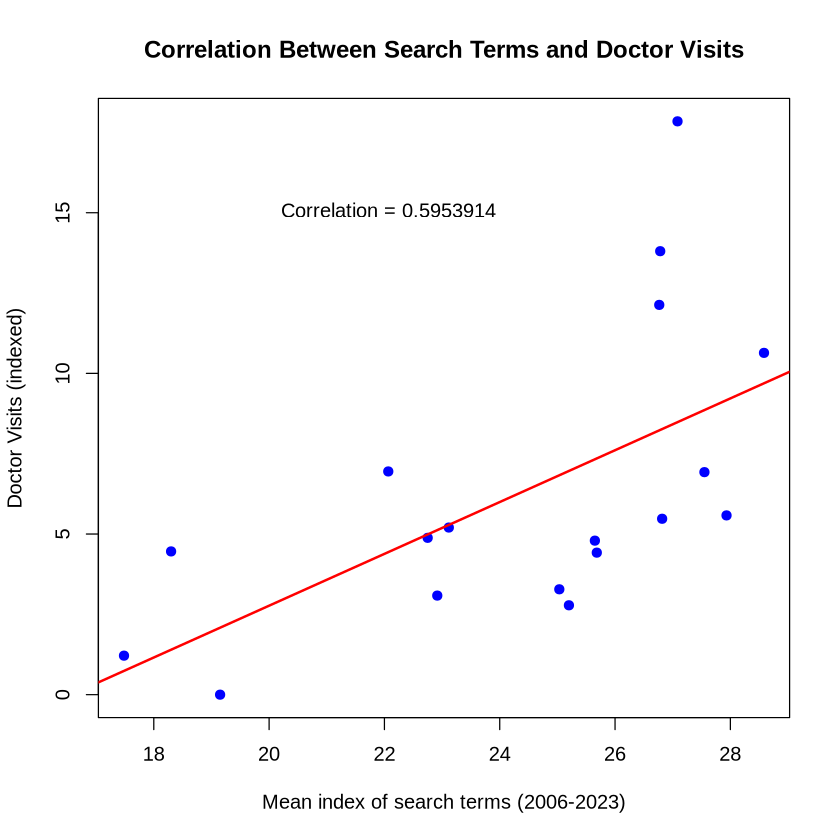

In [39]:
# Making a scatterplot to visualize  the correlation 
plot(combined_df$mean_google_trends, combined_df$Doctor_visits, 
     main = "Correlation Between Search Terms and Doctor Visits",
     xlab = "Mean index of search terms (2006-2023)", ylab = "Doctor Visits (indexed)",
     pch = 19, col = "blue")

# Adding regression line
model <- lm(Doctor_visits ~ mean_google_trends, data = combined_df)
abline(model, col = "red", lwd = 2)

# Add correlation text
text(x = 20, y = 15, labels = paste("Correlation =", round(correlation, 7)), col = "black", pos = 4)

#### Correlation Coefficient (r = 0.5953914):

This value indicates the strength and direction of the linear relationship between the mean search term index and the number of doctor visits.
A correlation coefficient of 0.595 indicates a moderate to strong positive relationship. 
* This means that as the mean of search term index increases (= more people search on mental health related terms) the number of doctor visits also tends to increase.
* OR as doctor visits increases people Googling mental health searches increases
* = To summarize, this suggests that people are both searching more for these search terms but also visit the doctor more often

#### The p-value of 0.009136:
is less than the commonly used significance level of 0.05. The p-value indicates that this relationship is statistically significant, suggesting that the observed correlation is not likely to have occurred by chance.

#### 95% Confidence Interval (0.1780001, 0.8312097)
This interval provides a range within which we can be 95% confident that the true population correlation coefficient lies.
The interval (0.178 to 0.831) does not include 0, further confirming that the correlation is significantly different from zero.

#### Conclusion = 
* Overall, this correlation analysis indicates a meaningful and significant correlation between Googling mental health related search terms and actual visits to the doctor over the years 2006 to 2023
* The positive value indicates that higher search trends are associated with higher doctor visits


### Correlation matrix with each search term 

In [9]:
# Making a correlation matrix creating a table showing correlation coefficients between variables. 
# Each cell in the table shows the correlation between two variables. 

cor(combined_df)

,Year,Angst,Depression,Frygt,Ensomhed,Selvmord,Doctor_visits,mean_google_trends
Year,1.0000000,0.9830058,0.5182496,0.7910915,0.9202777,-0.44602295,0.7626934,0.87716661
Angst,0.9830058,1.0000000,0.5018493,0.7523189,0.9325804,-0.49373196,0.6917427,0.86772997
Depression,0.5182496,0.5018493,1.0000000,0.6662867,0.5474862,0.12156299,0.1475087,0.78063823
Frygt,0.7910915,0.7523189,0.6662867,1.0000000,0.7435405,-0.24478855,0.5383248,0.79532069
Ensomhed,0.9202777,0.9325804,0.5474862,0.7435405,1.0000000,-0.46973125,0.6167503,0.83916720
Selvmord,-0.4460229,-0.4937320,0.1215630,-0.2447886,-0.4697313,1.00000000,-0.2290106,-0.03597425
Doctor_visits,0.7626934,0.6917427,0.1475087,0.5383248,0.6167503,-0.22901063,1.0000000,0.59539140
mean_google_trends,0.8771666,0.8677300,0.7806382,0.7953207,0.8391672,-0.03597425,0.5953914,1.00000000



* Fear and loneliness is relative close to the overall mean. 
* However, we get more insight in angst, depression and suicide:

Angst correlation with Doctor_visits: 0.6917
* This is a strong positive correlation, the highest among all search terms.
* Insight: People searching for "Angst" on Google might be more likely to visit doctors, indicating that anxiety-related concerns are closely linked to seeking professional help.

Depression correlation with Doctor_visits: 0.1475
* This is a weak positive correlation.
* Insight: Searches for "Depression" are not strongly linked to doctor visits compared to other terms. This could suggest that while depression is a significant mental health concern, people searching for it online may not seek medical attention as often.

Suicide correlation with Doctor_visits: -0.2290
* This is a weak negative correlation, and the only negative one in the matrix.
* Insight: A negative correlation suggests that searches for "Selvmord" are less likely to be associated with doctor visits.
* This might indicate that individuals concerned with suicide may seek help through non-medical means (e.g., helplines) or avoid professional help altogether.
* It could also suggets, that the overall correlation comes from more people going to the doctor, and then searching for their symptoms afterwards - but if someone commits suicide, they won't be able to go to the doctor, also meaning the won't Google it.


### Correlation matrix: showing correlation between search terms

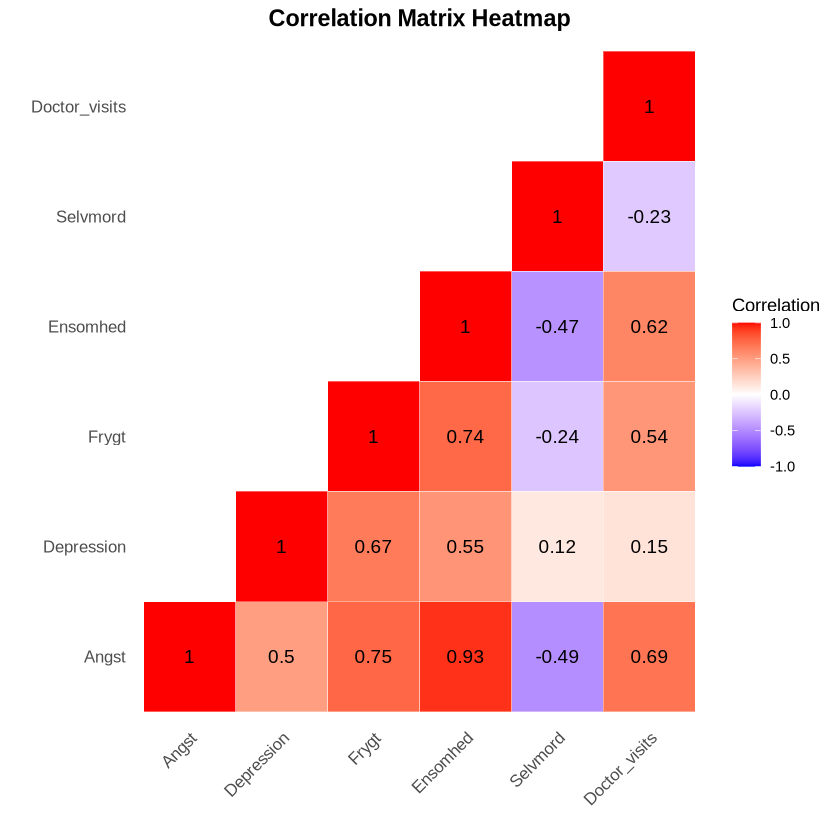

In [55]:
# Compute the correlation matrix
cor_matrix <- cor(combined_df[, c("Angst", "Depression", "Frygt", "Ensomhed", "Selvmord", "Doctor_visits")])

# Mask the upper triangle of the matrix to get a lower triangular layout
cor_matrix[upper.tri(cor_matrix)] <- NA

# Reshape the matrix for ggplot2
cor_melt <- melt(cor_matrix, na.rm = TRUE)

# Plot the heatmap
ggplot(data = cor_melt, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile(color = "white") +  # Heatmap tiles with white borders
  geom_text(aes(label = round(value, 2)), color = "black", size = 4) +  # Add correlation values
  scale_fill_gradient2(
    low = "blue", mid = "white", high = "red",
    midpoint = 0, limit = c(-1, 1), name = "Correlation"
  ) +  # Gradient for correlation
  labs(
    title = "Correlation Matrix Heatmap",
    x = "",
    y = ""
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 10),
    axis.text.y = element_text(size = 10),
    plot.title = element_text(size = 14, face = "bold", hjust = 0.5),
    panel.grid = element_blank()  # Remove grid lines for cleaner output
  )


The correlation matrix makes it possible to dive more into the index of each search term, instead of the overall mean.
In this plot we can see how each search term correlates with the others - showing that e.g. the increase of searches for anxiety corelates with increases in searching for depression, fear and loneliness.

Suicide is again a category for itself, only showing correlation with searches for depression


### Discussion / critical look on the correlation

* Correlation does not imply causation. While the data suggests a relationship, it doesn't prove that searching for mental health terms causes an increase in doctor visits (or the other way around)